<a href="https://colab.research.google.com/github/Build-Week-Saltiest-Hack-News-Trolls-2/datascience/blob/Moly-malibu-patch-1/Sentimental_Analysis_pre_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Sentimental Analysis Project:

In [166]:
!pip install vaderSentiment

In [0]:
#import Library
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import numpy as np
import spacy
from collections import Counter
from bs4 import BeautifulSoup

In [0]:
#create dataset
df = pd.read_csv('saltyhacker.csv')

In [0]:
#Str the data
df['Text'] = df['Text'].astype(str)

#CLEAN DATA

In [0]:
#clean DF
def clean_description(desc):
  soup = BeautifulSoup(desc)
  return soup.get_text()
df['rating'] = df['Text'].apply(clean_description)
df['words_length']  = df['rating'].str.len()

In [171]:
#clean HTML
import lxml.html.clean 

lxml.html.clean.clean_html('<html><head></head><bodyonload = loadfunc()>my text</body></html>')
print (BeautifulSoup('<').string) 
print (BeautifulSoup('&').string) 

None
None


In [0]:
#CLEAN DATA
#remove whitespace
df['rating'] = df['rating'].str.strip().str.lower()
df['Text'] = df['Text'].str.strip().str.lower()

#Start with date
df['rating'].str.match('\d?\d/\d?\d/\d{4}').all()

#\s indicates a white space. So [^\s] is any non-white space and includes letters, numbers, special characters
df['rating'] = df['rating'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

#Replace occurrences of pattern/regex in the Series/Index with some other string
df['Text'] = df['Text'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [173]:
df.head()

,User,Text,rating,words_length
0,thu2111,did those people criticise other epidemiologis...,did those people criticise other epidemiologis...,1519
1,noisy_boy,i like aliexpress because most of the times i ...,i like aliexpress because most of the times i ...,422
2,lopis,doesnxt really matter the progression of the s...,doesnt really matter the progression of the se...,324
3,aexol,i have added docs generator for graphql editor...,i have added docs generator for graphql editor...,259
4,frockington1,i havent seen any non sensationalized evidence...,i havent seen any non sensationalized evidence...,191


In [174]:
df['rating'].value_counts(normalize=True)

nan                                                                                                                                                                                                                                                                                                                                                        0.022037
it only takes one person to turn it around httpswwwaljazeeracomnewssouthkoreasudden                                                                                                                                                                                                                                                                        0.000596
i guess but i still feel that including nyc and rural wyoming under the same metric makes it useless something like sq feet under surveillance might be better                                                                                                                                  

#SENTIMENT ANALYSIS USING IN DE MODEL VADER
"VADER (Valence Aware Dictionary and sEntiment Reasoner) is a sentiment intensity tool added to NLTK in 2014. 

Unlike other techniques that require training on related text before use, VADER is ready to go for analysis without any special setup. VADER is unique in that it makes fine-tuned distinctions between varying degrees of positivity and negativity. 

For example, VADER scores “comfort” moderately positively and “euphoria” extremely positively. It also attempts to capture and score textual features common in informal online text such as capitalizations, exclamation points, and emoticons."

https://programminghistorian.org/en/lessons/sentiment-analysis

http://www.nltk.org/_modules/nltk/sentiment/vader.html

In [0]:
#vander model
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vaderize(sentence):
    return analyzer.polarity_scores(sentence)

In [0]:
#creared columns score with numbers
df['Scores'] = df['rating'].apply(vaderize)

In [0]:
#Create score by differente classification position into the text
df[['negative', 'neutral', 'positive', 'compound']] = df.Scores.apply(pd.Series)

In [178]:
for text in df.sort_values(by='neutral', ascending=False)['rating'].head(5):
    print(f"------ Topic ------")
    print(text, end="\n\n")

------ Topic ------
custom graphics and web design projects just had to start the timer keep track of what we were doing and submit the final time with teams it all adds up and you can see everyones time it took on a project and you can all add to the same time record

------ Topic ------
i just ordered a brand new apple macbook air with gigs for my daughter i cant even get apple to charge my card and ship the thing their estimate is midmay but i havent seen any traction on it at all its as if i didnt even order it

------ Topic ------
that makes sense though i suppose for a road warrior setup the source ip might change every so often right

------ Topic ------
false the se came out after the s

------ Topic ------
nan



In [179]:
#To See the count in the column
df['positive'].value_counts() 

0.000    503
0.114     13
0.073     13
0.069     12
0.092     12
        ... 
0.577      1
0.412      1
0.304      1
0.247      1
0.306      1
Name: positive, Length: 300, dtype: int64

In [180]:
#To See the count in the column
df['neutral'].value_counts() 

1.000    311
0.842     12
0.865     12
0.882     11
0.833     11
        ... 
0.686      1
0.488      1
0.680      1
0.607      1
0.665      1
Name: neutral, Length: 367, dtype: int64

In [181]:
#To See the count in the column
df['negative'].value_counts() 

0.000    731
0.044     12
0.031     11
0.033     11
0.051     11
        ... 
0.139      1
0.328      1
0.268      1
0.261      1
0.241      1
Name: negative, Length: 251, dtype: int64

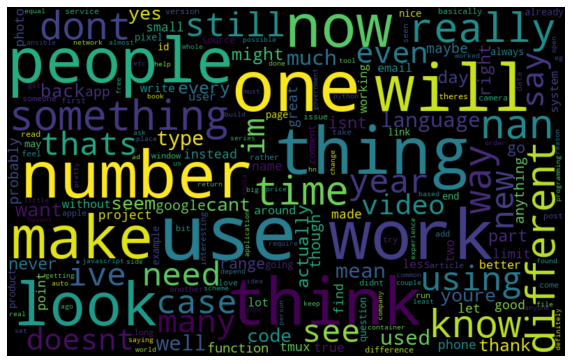

In [182]:
#Graphic to see negative words
from wordcloud import WordCloud 
from matplotlib import pyplot as plt
negative_words = ' '.join([text for text in df['rating'][df['negative'] == 0]])

wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [190]:
#Model to se final prediction
Model = SentimentIntensityAnalyzer()
def score(sentence, Model):
    return Model.polarity_scores(sentence)['compound']

# Sentiment score
df['final_score'] = df['Text'].apply(lambda x: score(x, Model))

#Discretize variable into equal-sized buckets based on rank or based on sample quantiles.
df['final_pred'] = pd.cut(df['final_score'], bins=5, labels=[1, 2, 3, 4, 5])
df = df.drop('final_score', axis=1).sort_values(by=['User']).iloc[:5]
df

,User,Text,rating,words_length,Scores,negative,neutral,positive,compound,final_pred
1580,kazinator,i suspect the real reason is the same reason w...,i suspect the real reason is the same reason w...,488,"{'neg': 0.117, 'neu': 0.855, 'pos': 0.029, 'co...",0.117,0.855,0.029,-0.7650,5
1279,patrickmcmanus,the author is writing in that section about bl...,the author is writing in that section about bl...,155,"{'neg': 0.314, 'neu': 0.686, 'pos': 0.0, 'comp...",0.314,0.686,0.000,-0.8598,3
657,pierrebai,worse its psychological claims are entirely ma...,worse its psychological claims are entirely ma...,200,"{'neg': 0.215, 'neu': 0.718, 'pos': 0.067, 'co...",0.215,0.718,0.067,-0.7184,5
0,thu2111,did those people criticise other epidemiologis...,did those people criticise other epidemiologis...,1519,"{'neg': 0.128, 'neu': 0.848, 'pos': 0.024, 'co...",0.128,0.848,0.024,-0.9782,1
621,user5994461,gtgt terraform doesnxt quotaccidentallyquot de...,terraform doesnt accidentally delete things i...,566,"{'neg': 0.1, 'neu': 0.858, 'pos': 0.042, 'comp...",0.100,0.858,0.042,-0.7764,3


In [187]:
#percentage value in a column  by category 
df['final_pred'].value_counts(normalize=True) * 100

5    40.0
3    40.0
1    20.0
4     0.0
2     0.0
Name: final_pred, dtype: float64

#SIMPLE MODEL USING TEXTBLOB LIBRARY

TextBlob is a Python (2 and 3) library for processing textual data. It provides a consistent API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, and is a simple interface.

#NOTA:

This small model generally shows whether the text is neutral, positive, or negative. which is essentially what the whole project is looking for.  corroborating with the vander model that in general most words are neutral according to the percentage in each column.

In [191]:
#Modelo use Textblob
import csv
from textblob import TextBlob

article = 'saltyhacker.csv'

with open(article, 'r') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        sentence = row[1]
        print (sentence)
        blob = TextBlob(sentence)
        print (blob.sentiment)

Text
Sentiment(polarity=0.0, subjectivity=0.0)
Did those people criticise other epidemiologists for doing the same? Immediately holding press conferences appears to be standard behaviour during this outbreak; for example, Imperial and Oxford both did the same. In fact in the Oxford case the press published stories about the paper before it was even available <i>anywhere</i>, let alone in a journal.<p>I understand why at the moment peer review is being short circuited by everyone, regardless of political or epidemiological position. The world is hungry for news and journalists will interpret papers with or without the help of the authors. Might as well have their assistance, in these circumstances.<p>Your remark about &quot;conservative news outlets&quot; shows what&#x27;s really going on here, I suspect - just another day in politically biased academia-land. If you talk to anything other than CNN then you&#x27;re bad and wrong. The same has been seen with Alex Berenson, a former NYT jo

In [192]:
#create a textblob object
obj = TextBlob(article)

#Returns a value between -1 and 1
sentiment = obj.sentiment.polarity
print(sentiment)

0.0


In [193]:
#TextBlob
if sentiment == 0:
  print('The text is neutral')
elif sentiment > 0:
  print('The text is positive')
else:
  print('The Text is negative')

The text is neutral


#CONCLUTION

#COMPARE TEXTBLOB AND VANDER SENTIMENTAL 

We can conclude that in both model can show if the text or article in general is neutral, positive, or negative. 

In this case is confirmed that the mayority words is neutral in both models.